In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh') # for style

In [9]:
cd ../

C:\Users\rrrod


In [16]:
# Loads data from the specified file paths
SDR0_1420_0 = np.load('FFC_4/data/testing_041624/testing_SDR0_0.npz')['data']
SDR1_1420_0 = np.load('FFC_4/data/testing_041624/testing_SDR1_0.npz')['data']

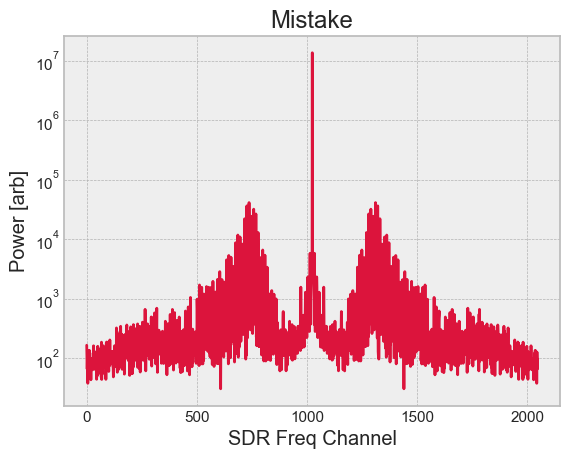

In [37]:
# Plots it!
plt.semilogy(SDR0_1420_0, color='crimson')
plt.title('Mistake')
plt.xlabel('SDR Freq Channel')
plt.ylabel('Power [arb]')
plt.show()

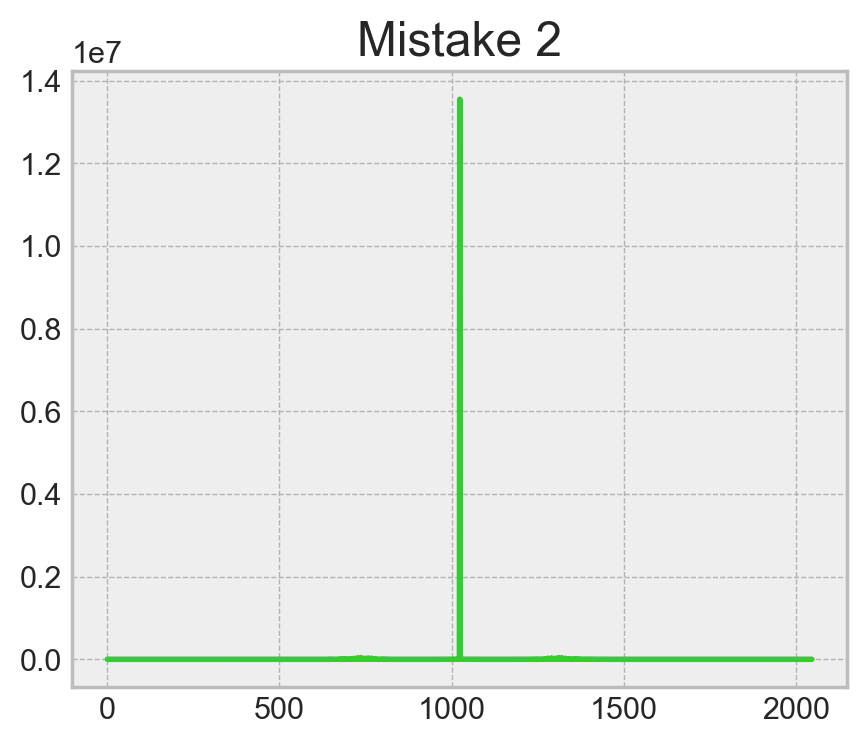

In [38]:

plt.figure(figsize=(5, 4), dpi=200)
plt.plot(SDR0_1420_0, color='limegreen')
plt.title('Mistake 2')
plt.show()

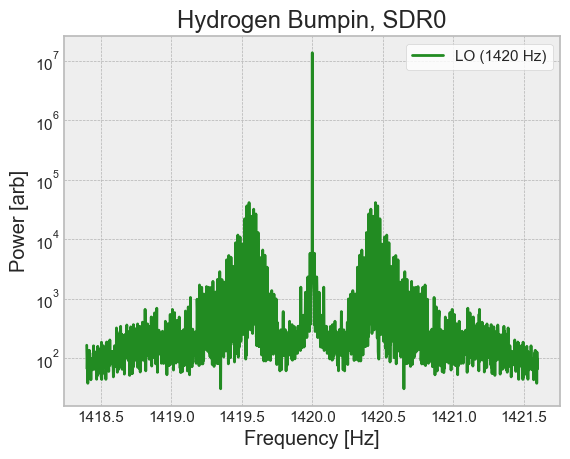

In [41]:
# Get frequency axis
frequency_axis = np.fft.fftshift(np.fft.fftfreq(len(SDR0_1420_0), 1/3.2))
LO_1420 = 1420
LO_1420p8 = 1420.8
freqs_1420 = frequency_axis + LO_1420
freqs_1420p8 = frequency_axis + LO_1420p8

# Plotting with LO frequencies
plt.semilogy(freqs_1420, SDR0_1420_0, label='LO (1420 Hz)', color='forestgreen')
plt.title('Hydrogen Bumpin, SDR0')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [arb]')
plt.legend(facecolor='white')
plt.show()

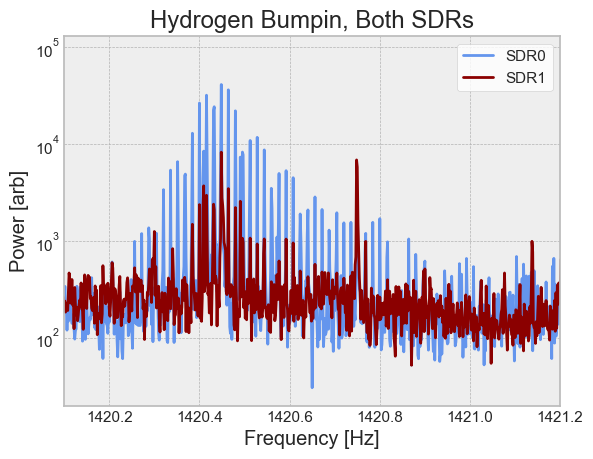

In [52]:
plt.semilogy(freqs_1420, SDR0_1420_0, label='SDR0', color='cornflowerblue')
plt.semilogy(freqs_1420, SDR1_1420_0, label='SDR1', color='darkred')
plt.title('Hydrogen Bumpin, Both SDRs')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [arb]')
plt.xlim(1420.1, 1421.2)
plt.ylim(20, 19**4)
plt.legend(facecolor='white')
plt.show()

Text(0.5, 1.0, 'HI bump, SDR1')

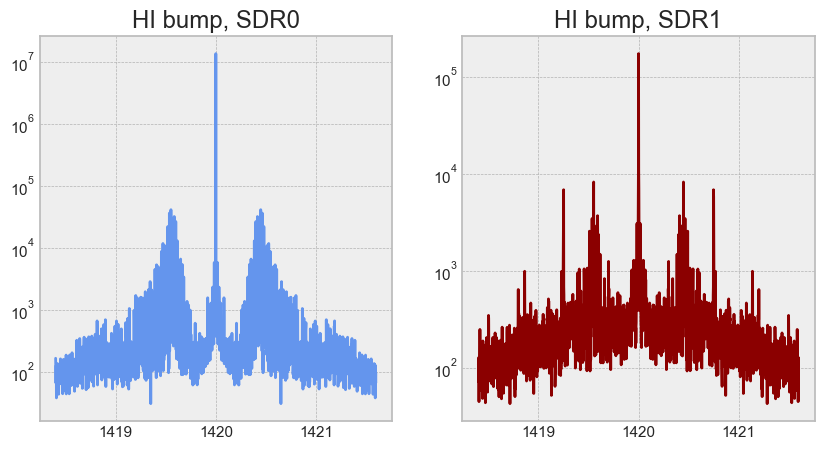

In [54]:
# Plotting in subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].semilogy(freqs_1420, SDR0_1420_0, label='SDR0 @ LO 1420', color='cornflowerblue')
ax[0].set_title('HI bump, SDR0')
ax[1].semilogy(freqs_1420, SDR1_1420_0, label='SDR1 @ LO 1420', color='darkred')
ax[1].set_title('HI bump, SDR1')

In [55]:
# Set common properties for subplots
for axis in ax:
    axis.set(xlabel='Freq [hz]', ylabel='Power [arb]', xlim=(1420.1, 1421.3), ylim=(10, 10**5))
ax[1].set_ylim(10, 10**5)
for axis in ax:
    axis.legend(facecolor='white')
plt.show()

# Load and process the specific data
random_spec = np.load('FFC_4/data/042224/capture_042224/spec3_2_L134_B20.npz')['data0']

def shift(signal):
    return np.fft.fftshift(signal)

spec_fft = shift(random_spec)

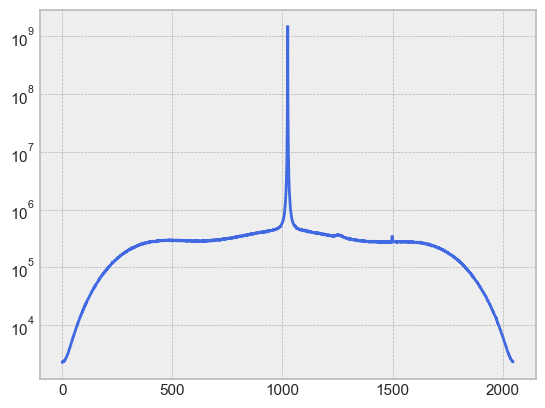

In [56]:
plt.semilogy(spec_fft, color='royalblue')

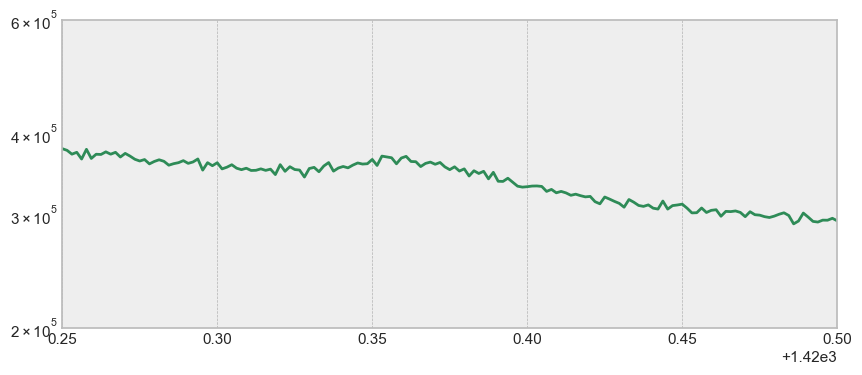

In [57]:
# Plot the processed data
freqs = 1420 + np.fft.fftshift(np.fft.fftfreq(len(spec_fft), 1/3.2))
plt.figure(figsize=(10, 4))
plt.semilogy(freqs, spec_fft, color='seagreen')
plt.xlim(1420.25, 1420.5)
plt.ylim(2e5, 6e5)
plt.show()